<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**
Joshua Dollison

MAT421-16133

1/26/2025


In [ ]:
#ex 1
import numpy as np
import matplotlib.pyplot as plt

#ex 2
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

# **17.1: Interpolation Problem Statement**

The course textbook explains a situation in which we, the reader, would like to find an estimation function $\widehat{y}(x)$ such that $\widehat{y}(x_i) = y_i$
for every point in our dataset. This means the estimation function goes through our data points. Given a new $x*$, we can **interpolate** its function value using $\widehat{y}(x*)$. In this context, $\widehat{y}$ is called an **interpolation** function.

Put more succinctly, interpolation estimates values between known data points. This example visualizes how data points are connected, and intermediate values are interpolated.

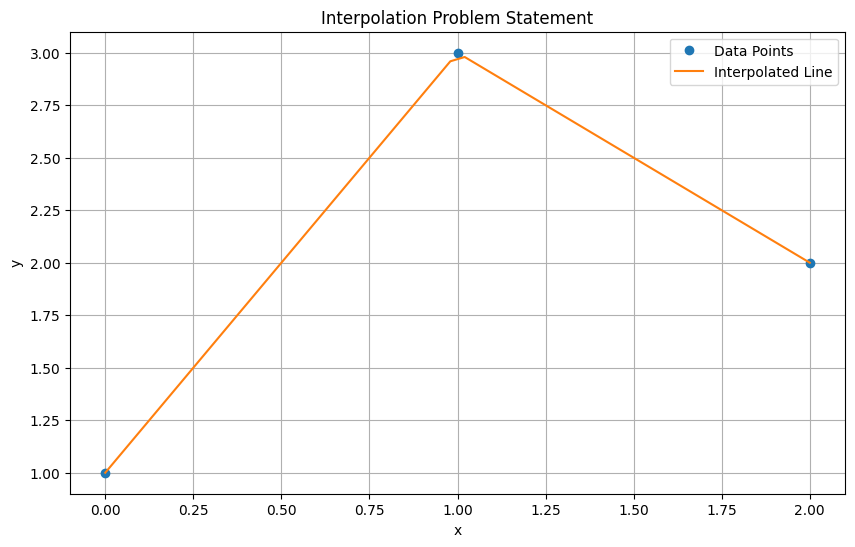

In [ ]:
# Known data points
x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

# Linear interpolation between points
x_new = np.linspace(0, 2, 50)
y_new = np.interp(x_new, x, y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Interpolated Line')
plt.title('Interpolation Problem Statement')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# **17.2: Linear Interpolation**

As the name implies, **linear interpolation** estimates values along a straight line between two nearest data points. This method is efficient for a small dataset.

The course text states that, in linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and
right. Assume, without loss of generality, that the $x$-data points are in ascending order; that is, $x_i < x_{i + 1}$, and let $x$ be a point such that $x_i < x < x_{i + 1}$. Then the linear interpolation at $x$ is $\widehat{y}(x) = \frac{(y_{i+1}-y_{i})(x-x_i)}{(x{i+1}-x_i)}$.

In the example below, I use the interp1d function from scipy to estimate several $\widehat{y}$ values using linear interpolation.  The path between known values is represented as a line chart with the estimated values drawn on top.

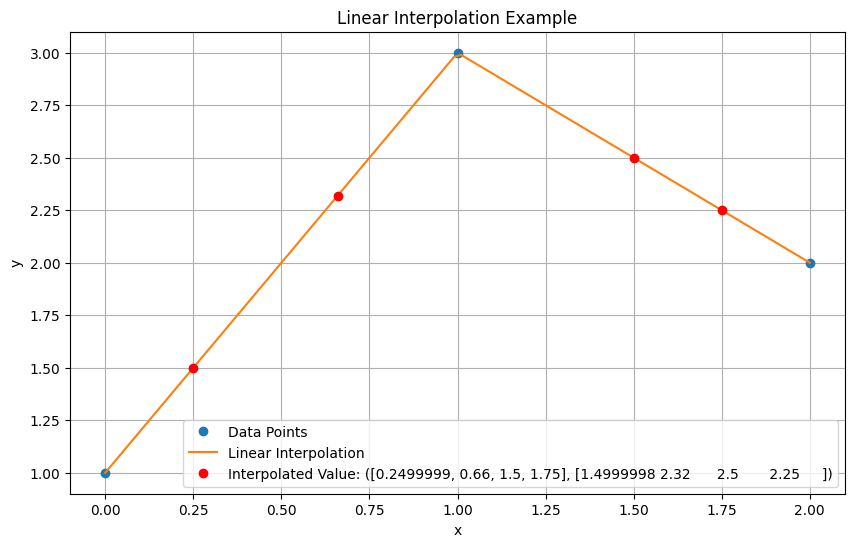

In [ ]:
# Data points
x = [0, 1, 2]
y = [1, 3, 2]

# Linear interpolation
linear_interp = interp1d(x, y, kind='linear')

# Interpolated value at x = 1.5
x_query = [0.2499999, 0.66, 1.5, 1.75]
y_query = linear_interp(x_query)

# Visualization
x_new = np.linspace(0, 2, 100)
y_new = linear_interp(x_new)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Linear Interpolation')
plt.plot(x_query, y_query, 'ro', label=f'Interpolated Value: ({x_query}, {y_query})')
plt.title('Linear Interpolation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


## **17.3: Cubic Spline Interpolation**

Cubic spline interpolation constructs a smooth curve passing through all data points by using piecewise cubic polynomials.  According to the course text, if we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i$ that is valid for $x_i \le x \le x_{i+1}$. Then to fnd the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions.



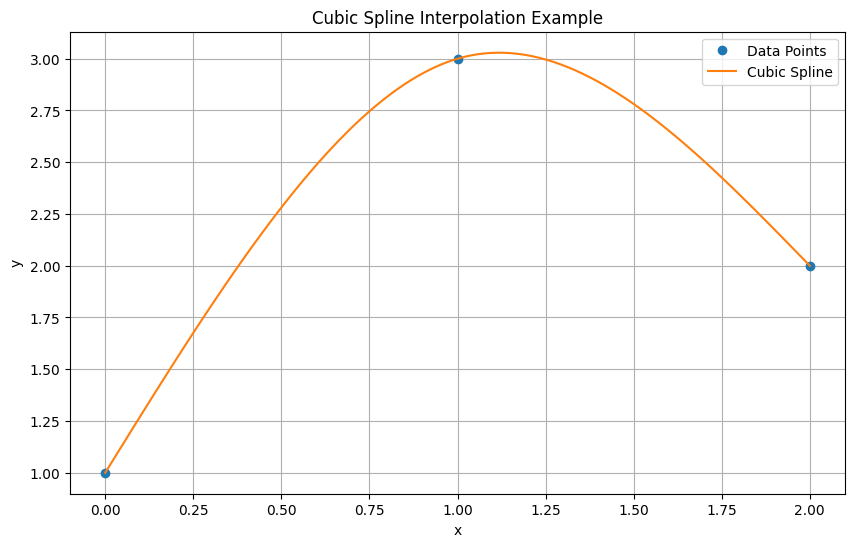

In [ ]:
# Data points
x = [0, 1, 2]
y = [1, 3, 2]

# Cubic spline interpolation
cubic_spline = CubicSpline(x, y, bc_type='natural')

# New x values for smoother curve
x_new = np.linspace(0, 2, 100)
y_new = cubic_spline(x_new)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Cubic Spline')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()
